# Analysis of happiness in the World during 2017 with Machine learning

## Set up

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

## Data preparation

In [2]:
# import the csv as a data frame
df = pd.read_csv("WHR20_DataForTable2-1.csv").iloc[:,list(range(0,14))]
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


In [3]:
# Select only the data from year 2017
df = df[df['year'] == 2017]

df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
9,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218
21,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.333884,0.457738,0.290326,-0.128311
29,Algeria,2017,5.248912,9.537937,0.806754,65.699997,0.436670,-0.187750,0.699774,0.641980,0.288710,NaN,-0.910273,-0.813394
47,Argentina,2017,6.039330,9.849303,0.906699,68.599998,0.831966,-0.178522,0.841052,0.809423,0.291717,0.305430,0.348275,-0.160797
61,Armenia,2017,4.287736,9.076206,0.697925,66.599998,0.613697,-0.130840,0.864683,0.625014,0.437149,0.246901,-0.590791,-0.134983


In [4]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    1
Social support                        1
Healthy life expectancy at birth      4
Freedom to make life choices          1
Generosity                            2
Perceptions of corruption            10
Positive affect                       1
Negative affect                       1
Confidence in national government    13
Democratic Quality                    0
Delivery Quality                      0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
# Number of columns and rows
df.shape

(128, 14)

In [7]:
# Type of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 9 to 1845
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       128 non-null    object 
 1   year                               128 non-null    int64  
 2   Life Ladder                        128 non-null    float64
 3   Log GDP per capita                 128 non-null    float64
 4   Social support                     128 non-null    float64
 5   Healthy life expectancy at birth   128 non-null    float64
 6   Freedom to make life choices       128 non-null    float64
 7   Generosity                         128 non-null    float64
 8   Perceptions of corruption          128 non-null    float64
 9   Positive affect                    128 non-null    float64
 10  Negative affect                    128 non-null    float64
 11  Confidence in national government  128 non-null    float6

In [8]:
df.describe().transpose().iloc[1:].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Healthy life expectancy at birth,128.0,64.111719,7.315958,45.200001,58.275000,66.149998,69.525000,76.500000
Log GDP per capita,128.0,9.242259,1.203391,6.625160,8.212197,9.412837,10.245897,11.441448
Life Ladder,128.0,5.494466,1.150695,2.661718,4.579116,5.599736,6.321369,7.788252
Social support,128.0,0.807389,0.125772,0.319589,0.729447,0.830446,0.909473,0.966753
Freedom to make life choices,128.0,0.785549,0.123797,0.427011,0.713833,0.815021,0.887017,0.985178
Perceptions of corruption,128.0,0.728174,0.186697,0.161791,0.670283,0.786570,0.854425,0.954393
Positive affect,128.0,0.710152,0.107260,0.420962,0.621262,0.728402,0.795868,0.902772
Confidence in national government,128.0,0.507805,0.205817,0.110937,0.347119,0.498337,0.642956,0.981398
Negative affect,128.0,0.288134,0.088704,0.148160,0.225034,0.276348,0.335568,0.599335
Delivery Quality,128.0,0.040403,0.975618,-1.744187,-0.677507,-0.167586,0.773719,2.072883


## Data distribution

/home/omar_lab/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/omar_lab/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/omar_lab/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/omar_lab/anaconda3/lib/python

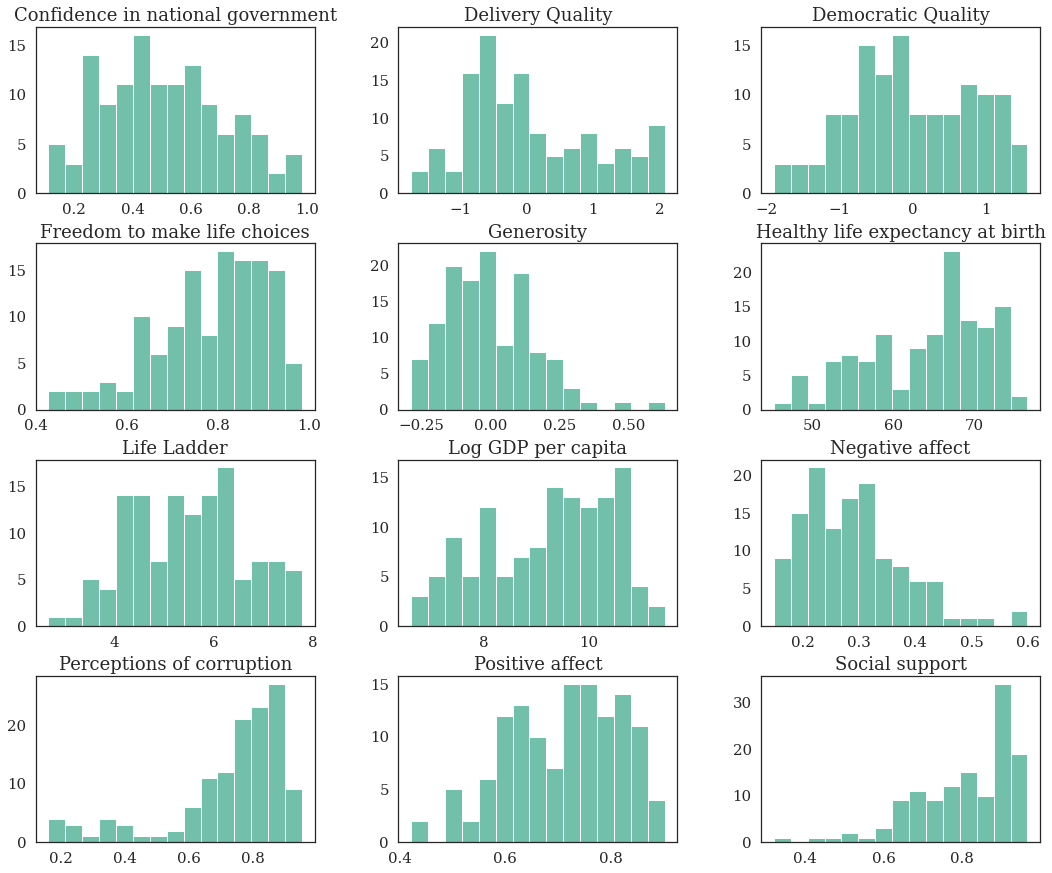

In [9]:
# Seaborn font sixe and style plot
sns.set(font_scale = 1.5, style = "white")

# 
plt.rc('font', family = "serif")

df.iloc[:,2:].hist(figsize=(18,15),
                  bins = 15, xlabelsize = 15, ylabelsize=15,
                  color = "#72BFAA", grid = False)
plt.show()

## Bar charts